In [45]:
%matplotlib inline

In [1]:
import mne

In [4]:
mne.set_log_level('INFO')

In [5]:
from mne.datasets import sample

In [6]:
data_path = sample.data_path()

In [8]:
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print raw_fname

/Users/jrubin/Developer/grasp-and-lift/venv/lib/python2.7/site-packages/examples/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [9]:
raw = mne.io.Raw(raw_fname)

Opening raw data file /Users/jrubin/Developer/grasp-and-lift/venv/lib/python2.7/site-packages/examples/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
Current compensation grade : 0
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [10]:
raw

<Raw  |  n_channels x n_times : 376 x 41700>

In [11]:
raw.info

<Info | 20 non-empty fields
    bads : list | MEG 2443, EEG 053
    buffer_size_sec : numpy.float64 | 13.3196808772
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : dict | 3 items
    dig : list | 146 items
    events : list | 0 items
    file_id : dict | 4 items
    filename : unicode | /Users/jru.../sample_audvis_filt-0-40_raw.fif
    highpass : float | 0.10000000149
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0
    meas_date : numpy.ndarray | 2002-12-03 11:01:10
    meas_id : dict | 4 items
    nchan : int | 376
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.153747559
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
 

In [14]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

In [15]:
help(raw.time_as_index)

Help on method time_as_index in module mne.io.base:

time_as_index(self, times, use_first_samp=False) method of mne.io.fiff.raw.RawFIF instance
    Convert time to indices
    
    Parameters
    ----------
    times : list-like | float | int
        List of numbers or a number representing points in time.
    use_first_samp : boolean
        If True, time is treated as relative to the session onset, else
        as relative to the recording onset.
    
    Returns
    -------
    index : ndarray
        Indices corresponding to the times supplied.



In [25]:
# Retrieve index of start, stop given time in seconds
start, stop = raw.time_as_index([100, 115])

In [28]:
# Retreive matrix of data and vector of times from raw
data, times = raw[:, start:stop]

Reading 15015 ... 17266  =     99.998 ...   114.989 secs...
[done]


In [30]:
data.shape

(376, 2252)

In [33]:
times.shape

(2252,)

In [37]:
# Retrieve channles (2, 5, 8, 11, 14, 17) from 100s - 115s (???)
data, times = raw[2:20:3, start:stop]

Reading 15015 ... 17266  =     99.998 ...   114.989 secs...
[done]


In [39]:
data[0, :10]

array([ -1.28994619e-12,  -1.03468366e-12,  -5.22648086e-13,
        -4.43111744e-13,  -8.80294462e-13,  -1.29830853e-12,
        -1.25421279e-12,  -8.19516522e-13,  -4.31256274e-13,
        -4.74533071e-13])

Reading 0 ... 1500  =      0.000 ...     9.990 secs...
[done]


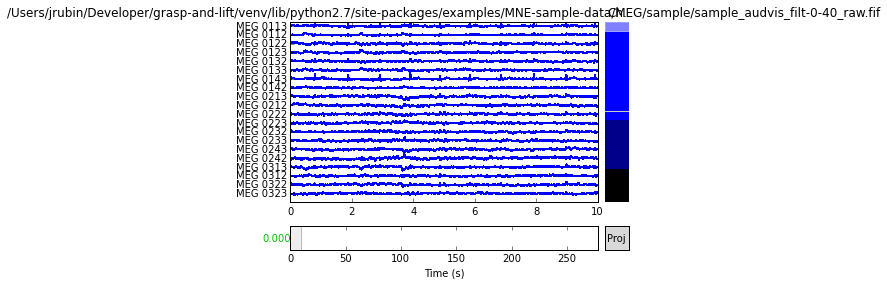

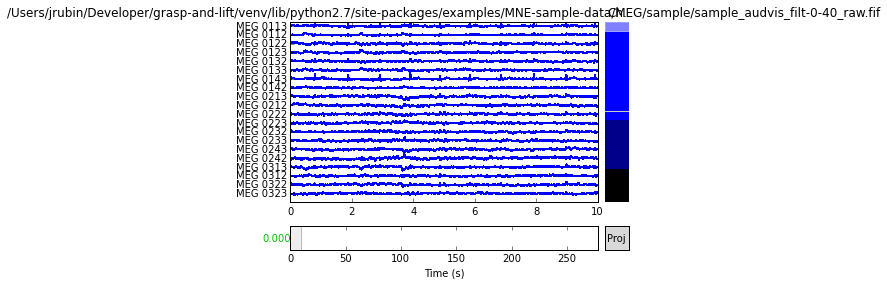

In [47]:
raw.plot()

In [56]:
# Pick channels by type and names
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True, exclude='bads')

In [57]:
# Save a sample from the raw data
raw.save('sample_audvis_meg_raw.fif', tmin=0, tmax=150, picks=picks, overwrite=True)

Reading 0 ... 0  =      0.000 ...     0.000 secs...
[done]
Overwriting existing file.
Writing /Users/jrubin/Developer/grasp-and-lift/sample_audvis_meg_raw.fif
Reading 0 ... 1501  =      0.000 ...     9.996 secs...
[done]
Writing ...
Reading 1502 ... 3003  =     10.003 ...    20.000 secs...
[done]
Writing ...
Reading 3004 ... 4505  =     20.006 ...    30.003 secs...
[done]
Writing ...
Reading 4506 ... 6007  =     30.009 ...    40.006 secs...
[done]
Writing ...
Reading 6008 ... 7509  =     40.012 ...    50.009 secs...
[done]
Writing ...
Reading 7510 ... 9011  =     50.015 ...    60.012 secs...
[done]
Writing ...
Reading 9012 ... 10513  =     60.018 ...    70.015 secs...
[done]
Writing ...
Reading 10514 ... 12015  =     70.022 ...    80.018 secs...
[done]
Writing ...
Reading 12016 ... 13517  =     80.025 ...    90.021 secs...
[done]
Writing ...
Reading 13518 ... 15019  =     90.028 ...   100.024 secs...
[done]
Writing ...
Reading 15020 ... 16521  =    100.031 ...   110.027 secs...
[done]


In [78]:
# event columns = [time_instant, _, event_id]
events = mne.find_events(raw, stim_channel='STI 014')

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
[done]
319 events found
Events id: [ 1  2  3  4  5 32]


In [70]:
stim_data, stim_times = raw[raw.ch_names.index('STI 014'), :]

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
[done]


In [76]:
events[:5]

array([[6994,    0,    2],
       [7086,    0,    3],
       [7192,    0,    1],
       [7304,    0,    4],
       [7413,    0,    2]])

In [84]:
event_id = {'aud_l' : 1, 'aud_r' : 2} # event trigger and conditions
tmin = -0.2 # start of each epoch (200ms before the trigger)
tmax = 0.5 # end of each epoch (500ms after the trigger)

In [83]:
event_id

{'aud_l': 1, 'aud_r': 2}

In [85]:
# Exclude some channels
raw.info['bads'] += ['MEG 2443', 'EEG 053']

In [86]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True, stim=False, exclude='bads')

In [89]:
mag_picks = mne.pick_types(raw.info, meg='mag', eog=True, exclude='bads')
grad_picks = mne.pick_types(raw.info, meg='grad', eog=True, exclude='bads')

In [90]:
mag_picks

array([  2,   5,   8,  11,  14,  17,  20,  23,  26,  29,  32,  35,  38,
        41,  44,  47,  50,  53,  56,  59,  62,  65,  68,  71,  74,  77,
        80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110, 113, 116,
       119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152, 155,
       158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194,
       197, 200, 203, 206, 209, 212, 215, 218, 221, 224, 227, 230, 233,
       236, 239, 242, 245, 248, 251, 254, 257, 260, 263, 266, 269, 272,
       275, 278, 281, 284, 287, 290, 293, 296, 299, 302, 305, 375])

In [91]:
baseline = (None, 0)

In [93]:
# Define peak-to-peak rejection parameters for gradiometers, magnetometers and EOG
reject = {'grad' : 4000e-13, 'mag' : 4e-12, 'eog' : 150e-6}

In [95]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=baseline, preload=False, reject=reject)

Created an SSP operator (subspace dimension = 4)
4 projection items activated
145 matching events found


In [96]:
epochs

<Epochs  |  n_events : 145 (good & bad), tmin : -0.2 (s), tmax : 0.5 (s), baseline : (None, 0),
 'aud_l': 72, 'aud_r': 73>

In [105]:
# Tensor of epoch data [instances, channels, time]
epochs_data = epochs['aud_l'].get_data()

Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2377 ... 2482  =     15.830 ...    16.530 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2771 ... 2876  =     18.454 ...    19.154 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3197 ... 3302  =     21.292 ...    21.991 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3621 ... 3726  =     24.115 ...    24.815 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 4051 ... 4156  =     26.979 ...    27.678 secs...
[done]
Applying baseline correction ... (mode: mean)
Rea

In [104]:
epochs_data.shape

(55, 365, 106)

In [107]:
epochs_data[0]

array([[ -8.57552496e-13,   5.74204026e-13,   3.43519199e-12, ...,
          4.57913617e-12,   4.21854321e-12,   4.84738727e-12],
       [ -5.02848921e-12,  -3.71252918e-12,  -1.53728069e-12, ...,
          1.22807507e-12,   2.75757566e-12,   1.24265128e-12],
       [ -1.21610046e-13,  -4.65164765e-14,  -1.80027750e-14, ...,
         -1.20773949e-13,  -6.27475200e-14,   1.09434721e-13],
       ..., 
       [  4.81743685e-07,   8.48431554e-07,   8.75833020e-07, ...,
          6.39662684e-06,   5.99733168e-06,   6.86264451e-06],
       [ -2.75863002e-06,  -3.07336242e-06,  -3.00902778e-06, ...,
          3.32847363e-06,   2.71609712e-06,   2.68885412e-06],
       [ -5.90281978e-06,  -3.86070470e-06,  -1.25999990e-06, ...,
          4.86930300e-06,   5.79236292e-06,   3.74660667e-06]])

In [108]:
from scipy import io

/Users/jrubin/Developer/grasp-and-lift/venv/lib/python2.7/site-packages/scipy/io/matlab/mio4.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .mio_utils import squeeze_element, chars_to_strings
/Users/jrubin/Developer/grasp-and-lift/venv/lib/python2.7/site-packages/scipy/io/matlab/mio4.py:18: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility
  from .mio_utils import squeeze_element, chars_to_strings
/Users/jrubin/Developer/grasp-and-lift/venv/lib/python2.7/site-packages/scipy/io/matlab/mio5.py:98: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  from .mio5_utils import VarReader5
/Users/jrubin/Developer/grasp-and-lift/venv/lib/python2.7/site-packages/scipy/io/matlab/mio5.py:98: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility
  from .mio5_utils import VarReader5


In [109]:
# Save epoch data in matlab format
io.savemat('epochs_data.mat', {'epochs_data' : epochs_data}, oned_as='row')

In [112]:
# Save in fif format, keep all information about the data
epochs.save('sample-epo.fif')

Reading 514 ... 619  =      3.423 ...     4.122 secs...
[done]
Applying baseline correction ... (mode: mean)
    Rejecting  epoch based on EOG : ['EOG 061']
Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 933 ... 1038  =      6.214 ...     6.913 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1330 ... 1435  =      8.858 ...     9.557 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1753 ... 1858  =     11.675 ...    12.374 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2153 ... 2258  =     14.339 ...    15.038 secs...
[done]
Appl

In [113]:
saved_epochs = mne.read_epochs('sample-epo.fif')

Reading sample-epo.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (None)
        0 CTF compensation matrices available
Created an SSP operator (subspace dimension = 4)
4 projection items activated


In [124]:
epochs_data[0, 1].mean()

1.6483803217718905e-13

In [125]:
# Compute evoked responses for auditory responses by averaging
evoked = epochs['aud_l'].average()

Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2377 ... 2482  =     15.830 ...    16.530 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2771 ... 2876  =     18.454 ...    19.154 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3197 ... 3302  =     21.292 ...    21.991 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3621 ... 3726  =     24.115 ...    24.815 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 4051 ... 4156  =     26.979 ...    27.678 secs...
[done]
Applying baseline correction ... (mode: mean)
Rea

In [129]:
evoked

<Evoked  |  comment : 'aud_l', time : [-0.199795, 0.499488], n_epochs : 55, n_channels x n_times : 364 x 106>

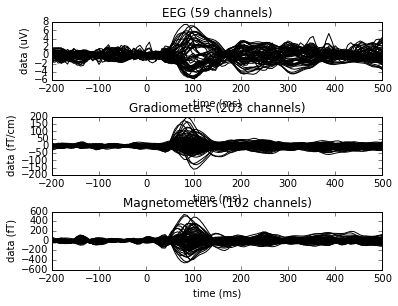

In [135]:
evoked_plot = evoked.plot()

In [131]:
import matplotlib.pyplot as plt

In [138]:
evoked_plot.savefig('evoked._aud_l.png', bbox_inches='tight')

In [152]:
# Extract the max value of each epoch
max_in_each_epoch = [e.max() for e in epochs['aud_l']]

Reading 712 ... 817  =      4.742 ...     5.441 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1132 ... 1237  =      7.539 ...     8.238 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1545 ... 1650  =     10.289 ...    10.989 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 1948 ... 2053  =     12.973 ...    13.673 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2377 ... 2482  =     15.830 ...    16.530 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2771 ... 2876  =     18.454 ...    19.154 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3197 ... 3302  =     21.292 ...    21.991 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3621 ... 3726  =     24.115 ...    24.815 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 4051 ... 4156  =     26.979 ...    27.678 secs...
[done]
Applying baseline correction ... (mode: mean)
Rea

In [153]:
print(max_in_each_epoch[:4]) 

[1.9375167201631338e-05, 1.6405516986429127e-05, 1.8545377810380125e-05, 2.0412807568093327e-05]
